#Actividad 4 (Regresión Lineal Simple)
##Santiago Rodriguez Woo - A01707834

##Importamos librerías


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

##Cargamos el df

In [5]:
df=pd.read_csv('DF_Mexico.csv')
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


In [6]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3596
Length: 75, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

#Separar columnas del tipo de cuarto: 'Shared room'

In [8]:
df1 = df[df['room_type'] == 'Shared room']
df1

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
174,617137,https://www.airbnb.com/rooms/617137,20230329041210,2023-03-30,city scrape,Apt near Mexico City's downtown,<b>The space</b><br />All services. 2 rooms. 1...,NaN,https://a0.muscache.com/pictures/9187120/91a96...,3059169,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN
437,5272066,https://www.airbnb.com/rooms/5272066,20230329041210,2023-03-30,city scrape,Gay UNAM Room,"Somos una pareja Gay, que ofrece una habitació...",The legend says that our neighborhood it was s...,https://a0.muscache.com/pictures/65876833/7114...,27291692,...,5.00,4.78,4.89,NaN,f,2,0,0,2,0.10
443,6076798,https://www.airbnb.com/rooms/6076798,20230329041210,2023-03-29,city scrape,Nova House,Tiene todas las comodidades para descansar si ...,El barrio es popular donde puedes tener la exp...,https://a0.muscache.com/pictures/0831e2e6-16f3...,31426842,...,4.91,4.68,4.93,NaN,t,1,0,0,1,0.73
472,5434219,https://www.airbnb.com/rooms/5434219,20230329041210,2023-03-30,city scrape,メキシコシティの革命記念塔付近のホステルです。,シングルルーム 30ドル<br />ダブルルーム 60ドル<br />ドミトリー 15ドル<...,NaN,https://a0.muscache.com/pictures/67818853/31c7...,28190065,...,4.72,4.80,4.60,NaN,f,2,0,1,1,0.26
499,7480645,https://www.airbnb.com/rooms/7480645,20230329041210,2023-03-30,city scrape,Lindo cuarto en la zona de Coyoácan,"Está en una zona tranquila, sin nada de ruido,...","Es una zona cultural, con construcciones de ti...",https://a0.muscache.com/pictures/94826950/a3cc...,39173299,...,4.90,4.90,4.57,NaN,f,2,0,1,1,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,845810769434337346,https://www.airbnb.com/rooms/845810769434337346,20230329041210,2023-03-29,city scrape,Cama en el centro histórico de CDMX 3 Veracruz,Disfruta de la sencillez de este alojamiento t...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,477263486,...,NaN,NaN,NaN,NaN,t,12,1,3,8,NaN
23762,844088337964077991,https://www.airbnb.com/rooms/844088337964077991,20230329041210,2023-03-30,city scrape,Camping roof,Quédate en el corazón de la colonia de valle e...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,231963962,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN
23894,850838789025926092,https://www.airbnb.com/rooms/850838789025926092,20230329041210,2023-03-30,city scrape,Lindo departamento nuevo,"Ubicación ideal, linda vista hacia el Eje Cent...",NaN,https://a0.muscache.com/pictures/1eb2f1c6-c277...,498342139,...,NaN,NaN,NaN,NaN,f,2,0,0,2,NaN
23898,847284366694948562,https://www.airbnb.com/rooms/847284366694948562,20230329041210,2023-03-30,city scrape,Roomies UNAM,"Ambiente familiar, nos apoyamos entre todos, s...",NaN,https://a0.muscache.com/pictures/c78c3877-261b...,121012818,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN


In [9]:
df1.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               103
Length: 75, dtype: int64

##Llenar con bfill los shared room

In [10]:
dfSR =df1.fillna(method="bfill")
dfSR

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
174,617137,https://www.airbnb.com/rooms/617137,20230329041210,2023-03-30,city scrape,Apt near Mexico City's downtown,<b>The space</b><br />All services. 2 rooms. 1...,The legend says that our neighborhood it was s...,https://a0.muscache.com/pictures/9187120/91a96...,3059169,...,5.00,4.78,4.89,NaN,f,1,0,0,1,0.10
437,5272066,https://www.airbnb.com/rooms/5272066,20230329041210,2023-03-30,city scrape,Gay UNAM Room,"Somos una pareja Gay, que ofrece una habitació...",The legend says that our neighborhood it was s...,https://a0.muscache.com/pictures/65876833/7114...,27291692,...,5.00,4.78,4.89,NaN,f,2,0,0,2,0.10
443,6076798,https://www.airbnb.com/rooms/6076798,20230329041210,2023-03-29,city scrape,Nova House,Tiene todas las comodidades para descansar si ...,El barrio es popular donde puedes tener la exp...,https://a0.muscache.com/pictures/0831e2e6-16f3...,31426842,...,4.91,4.68,4.93,NaN,t,1,0,0,1,0.73
472,5434219,https://www.airbnb.com/rooms/5434219,20230329041210,2023-03-30,city scrape,メキシコシティの革命記念塔付近のホステルです。,シングルルーム 30ドル<br />ダブルルーム 60ドル<br />ドミトリー 15ドル<...,"Es una zona cultural, con construcciones de ti...",https://a0.muscache.com/pictures/67818853/31c7...,28190065,...,4.72,4.80,4.60,NaN,f,2,0,1,1,0.26
499,7480645,https://www.airbnb.com/rooms/7480645,20230329041210,2023-03-30,city scrape,Lindo cuarto en la zona de Coyoácan,"Está en una zona tranquila, sin nada de ruido,...","Es una zona cultural, con construcciones de ti...",https://a0.muscache.com/pictures/94826950/a3cc...,39173299,...,4.90,4.90,4.57,NaN,f,2,0,1,1,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,845810769434337346,https://www.airbnb.com/rooms/845810769434337346,20230329041210,2023-03-29,city scrape,Cama en el centro histórico de CDMX 3 Veracruz,Disfruta de la sencillez de este alojamiento t...,Nuestros vecinos son especiales y muy discretos,https://a0.muscache.com/pictures/miso/Hosting-...,477263486,...,NaN,NaN,NaN,NaN,t,12,1,3,8,NaN
23762,844088337964077991,https://www.airbnb.com/rooms/844088337964077991,20230329041210,2023-03-30,city scrape,Camping roof,Quédate en el corazón de la colonia de valle e...,Nuestros vecinos son especiales y muy discretos,https://a0.muscache.com/pictures/miso/Hosting-...,231963962,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN
23894,850838789025926092,https://www.airbnb.com/rooms/850838789025926092,20230329041210,2023-03-30,city scrape,Lindo departamento nuevo,"Ubicación ideal, linda vista hacia el Eje Cent...",Nuestros vecinos son especiales y muy discretos,https://a0.muscache.com/pictures/1eb2f1c6-c277...,498342139,...,NaN,NaN,NaN,NaN,f,2,0,0,2,NaN
23898,847284366694948562,https://www.airbnb.com/rooms/847284366694948562,20230329041210,2023-03-30,city scrape,Roomies UNAM,"Ambiente familiar, nos apoyamos entre todos, s...",Nuestros vecinos son especiales y muy discretos,https://a0.muscache.com/pictures/c78c3877-261b...,121012818,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN


##Llenar esos datos con 'ffill'

In [11]:
dfSR = dfSR.fillna(method="ffill")
dfSR

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
174,617137,https://www.airbnb.com/rooms/617137,20230329041210,2023-03-30,city scrape,Apt near Mexico City's downtown,<b>The space</b><br />All services. 2 rooms. 1...,The legend says that our neighborhood it was s...,https://a0.muscache.com/pictures/9187120/91a96...,3059169,...,5.00,4.78,4.89,NaN,f,1,0,0,1,0.10
437,5272066,https://www.airbnb.com/rooms/5272066,20230329041210,2023-03-30,city scrape,Gay UNAM Room,"Somos una pareja Gay, que ofrece una habitació...",The legend says that our neighborhood it was s...,https://a0.muscache.com/pictures/65876833/7114...,27291692,...,5.00,4.78,4.89,NaN,f,2,0,0,2,0.10
443,6076798,https://www.airbnb.com/rooms/6076798,20230329041210,2023-03-29,city scrape,Nova House,Tiene todas las comodidades para descansar si ...,El barrio es popular donde puedes tener la exp...,https://a0.muscache.com/pictures/0831e2e6-16f3...,31426842,...,4.91,4.68,4.93,NaN,t,1,0,0,1,0.73
472,5434219,https://www.airbnb.com/rooms/5434219,20230329041210,2023-03-30,city scrape,メキシコシティの革命記念塔付近のホステルです。,シングルルーム 30ドル<br />ダブルルーム 60ドル<br />ドミトリー 15ドル<...,"Es una zona cultural, con construcciones de ti...",https://a0.muscache.com/pictures/67818853/31c7...,28190065,...,4.72,4.80,4.60,NaN,f,2,0,1,1,0.26
499,7480645,https://www.airbnb.com/rooms/7480645,20230329041210,2023-03-30,city scrape,Lindo cuarto en la zona de Coyoácan,"Está en una zona tranquila, sin nada de ruido,...","Es una zona cultural, con construcciones de ti...",https://a0.muscache.com/pictures/94826950/a3cc...,39173299,...,4.90,4.90,4.57,NaN,f,2,0,1,1,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,845810769434337346,https://www.airbnb.com/rooms/845810769434337346,20230329041210,2023-03-29,city scrape,Cama en el centro histórico de CDMX 3 Veracruz,Disfruta de la sencillez de este alojamiento t...,Nuestros vecinos son especiales y muy discretos,https://a0.muscache.com/pictures/miso/Hosting-...,477263486,...,3.67,4.67,3.67,NaN,t,12,1,3,8,3.00
23762,844088337964077991,https://www.airbnb.com/rooms/844088337964077991,20230329041210,2023-03-30,city scrape,Camping roof,Quédate en el corazón de la colonia de valle e...,Nuestros vecinos son especiales y muy discretos,https://a0.muscache.com/pictures/miso/Hosting-...,231963962,...,3.67,4.67,3.67,NaN,f,1,0,0,1,3.00
23894,850838789025926092,https://www.airbnb.com/rooms/850838789025926092,20230329041210,2023-03-30,city scrape,Lindo departamento nuevo,"Ubicación ideal, linda vista hacia el Eje Cent...",Nuestros vecinos son especiales y muy discretos,https://a0.muscache.com/pictures/1eb2f1c6-c277...,498342139,...,3.67,4.67,3.67,NaN,f,2,0,0,2,3.00
23898,847284366694948562,https://www.airbnb.com/rooms/847284366694948562,20230329041210,2023-03-30,city scrape,Roomies UNAM,"Ambiente familiar, nos apoyamos entre todos, s...",Nuestros vecinos son especiales y muy discretos,https://a0.muscache.com/pictures/c78c3877-261b...,121012818,...,3.67,4.67,3.67,NaN,f,1,0,0,1,3.00


In [12]:
dfSR.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [13]:
dfSR['host_response_rate'].describe()

count      293
unique      19
top       100%
freq       139
Name: host_response_rate, dtype: object

In [14]:
dfSR['host_acceptance_rate'].describe()

count      293
unique      26
top       100%
freq       122
Name: host_acceptance_rate, dtype: object

##Se tratan valores atípicos

In [15]:
# Lista de columnas a eliminar
columnas_eliminadas = ['neighbourhood_group_cleansed', 'bathrooms', 'license',
                       'id', 'scrape_id', 'host_id', 'host_listings_count',
                       'host_total_listings_count']

# Lista de columnas a mantener, que incluye 'host_response_rate' y 'price'
columnas_mantener = ['host_response_rate', 'price', 'host_acceptance_rate','room_type']

# Obtener todas las columnas numéricas que no están en la lista de columnas a eliminar
columnas_numericas = dfSR.select_dtypes(include=np.number).columns.difference(columnas_eliminadas)

# Crear un nuevo DataFrame que incluya las columnas que deseas mantener y las columnas numéricas
dfSR_numero = dfSR[columnas_mantener + list(columnas_numericas)]
dfSR_numero

,host_response_rate,price,host_acceptance_rate,room_type,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
174,50%,"$1,815.00",0%,Shared room,2,30,365,60,90,1.0,...,0,0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
437,50%,$182.00,86%,Shared room,2,11,346,41,71,1.0,...,0,5,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
443,90%,$450.00,100%,Shared room,12,1,302,1,27,1.0,...,1,17,4.83,4.94,4.93,4.91,4.68,4.83,4.93,0.73
472,100%,$272.00,96%,Shared room,16,26,354,56,86,1.0,...,0,3,4.80,4.68,4.48,4.72,4.80,4.40,4.60,0.26
499,100%,$320.00,100%,Shared room,2,16,351,46,76,1.0,...,1,4,4.70,4.86,4.62,4.90,4.90,4.58,4.57,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,100%,$250.00,100%,Shared room,1,30,365,60,90,1.0,...,0,0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23762,100%,$224.00,100%,Shared room,1,29,364,59,89,1.0,...,0,0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23894,100%,$720.00,95%,Shared room,5,30,364,60,90,1.0,...,0,0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23898,100%,$176.00,95%,Shared room,3,30,364,60,90,1.0,...,0,0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00


In [16]:
# Elimina el símbolo de porcentaje (%) y convierte 'host_response_rate' a números
dfSR_numero['host_response_rate'] = dfSR_numero['host_response_rate'].str.rstrip('%').astype(float)

# Elimina el símbolo de dólar ($) y convierte 'price' a números
dfSR_numero['price'] = dfSR_numero['price'].str.replace('$', '').str.replace(',', '').astype(float)

dfSR_numero['host_acceptance_rate'] = dfSR_numero['host_acceptance_rate'].str.rstrip('%').astype(float)

<ipython-input-16-ecf06f532147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSR_numero['host_response_rate'] = dfSR_numero['host_response_rate'].str.rstrip('%').astype(float)
<ipython-input-16-ecf06f532147>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfSR_numero['price'] = dfSR_numero['price'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-16-ecf06f532147>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [17]:
# Calcula el promedio de cada columna en dfSR_numero
promedio_columnas = dfSR_numero.mean()

# Rellena los valores nulos con el promedio de cada columna
dfSR_numero = dfSR_numero.fillna(promedio_columnas)

<ipython-input-17-0cf19b37966f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  promedio_columnas = dfSR_numero.mean()


In [18]:
y=dfSR_numero
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_response_rate                               174.910411
price                                           8597.160450
host_acceptance_rate                             165.980896
accommodates                                      11.090042
availability_30                                   52.207688
availability_365                                 618.006808
availability_60                                  100.136062
availability_90                                  145.711488
bedrooms                                           1.000000
beds                                              12.958404
calculated_host_listings_count                   100.977859
calculated_host_listings_count_entire_homes        5.992098
calculated_host_listings_count_private_rooms      49.863764
calculated_host_listings_count_shared_rooms       51.447060
calendar_updated                                        NaN
latitude                                          19.566872
longitude     

<ipython-input-18-125933947512>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-18-125933947512>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-18-125933947512>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence th

In [19]:
dfSR_1= dfSR_numero[(y<=Limite_Superior)&(y>=Limite_Inferior)]
dfSR_1

<ipython-input-19-fa4ae7138ae4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfSR_1= dfSR_numero[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,host_response_rate,price,host_acceptance_rate,room_type,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
174,50.0,1815.0,0.0,NaN,2.0,30,365,60.0,90.0,1.0,...,0.0,0.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
437,50.0,182.0,86.0,NaN,2.0,11,346,41.0,71.0,1.0,...,0.0,5.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
443,90.0,450.0,100.0,NaN,NaN,1,302,NaN,27.0,1.0,...,1.0,17.0,4.83,4.94,4.93,4.91,4.68,4.83,4.93,0.73
472,100.0,272.0,96.0,NaN,NaN,26,354,56.0,86.0,1.0,...,0.0,3.0,4.80,4.68,4.48,4.72,4.80,4.40,4.60,0.26
499,100.0,320.0,100.0,NaN,2.0,16,351,46.0,76.0,1.0,...,1.0,4.0,4.70,4.86,4.62,4.90,4.90,4.58,4.57,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,100.0,250.0,100.0,NaN,1.0,30,365,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23762,100.0,224.0,100.0,NaN,1.0,29,364,59.0,89.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23894,100.0,720.0,95.0,NaN,5.0,30,364,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23898,100.0,176.0,95.0,NaN,3.0,30,364,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00


In [20]:
dfSR_nulos = dfSR_1.isnull().sum()
dfSR_nulos

host_response_rate                                0
price                                             7
host_acceptance_rate                              0
room_type                                       293
accommodates                                      7
availability_30                                   0
availability_365                                  0
availability_60                                  19
availability_90                                  15
bedrooms                                          0
beds                                              9
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       4
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
calendar_updated                                293
latitude                                          3
longitude                                         9
maximum_maximum_nights                            0
maximum_mini

In [21]:
dfSR_limpios = dfSR_1.copy()
dfSR_limpios = dfSR_1.fillna(round(dfSR_1.mean(),1))
dfSR_limpios

,host_response_rate,price,host_acceptance_rate,room_type,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
174,50.0,1815.0,0.0,NaN,2.0,30,365,60.0,90.0,1.0,...,0.0,0.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
437,50.0,182.0,86.0,NaN,2.0,11,346,41.0,71.0,1.0,...,0.0,5.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
443,90.0,450.0,100.0,NaN,2.2,1,302,55.8,27.0,1.0,...,1.0,17.0,4.83,4.94,4.93,4.91,4.68,4.83,4.93,0.73
472,100.0,272.0,96.0,NaN,2.2,26,354,56.0,86.0,1.0,...,0.0,3.0,4.80,4.68,4.48,4.72,4.80,4.40,4.60,0.26
499,100.0,320.0,100.0,NaN,2.0,16,351,46.0,76.0,1.0,...,1.0,4.0,4.70,4.86,4.62,4.90,4.90,4.58,4.57,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,100.0,250.0,100.0,NaN,1.0,30,365,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23762,100.0,224.0,100.0,NaN,1.0,29,364,59.0,89.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23894,100.0,720.0,95.0,NaN,5.0,30,364,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23898,100.0,176.0,95.0,NaN,3.0,30,364,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00


In [22]:
dfSR_limpios['host_acceptance_rate'].describe()

count    293.000000
mean      82.136519
std       27.948126
min        0.000000
25%       71.000000
50%       98.000000
75%      100.000000
max      100.000000
Name: host_acceptance_rate, dtype: float64

In [23]:
dfSR_limpios['price'].describe()

count     293.000000
mean      584.712969
std       952.168384
min        83.000000
25%       203.000000
50%       310.000000
75%       567.000000
max      7500.000000
Name: price, dtype: float64

In [24]:
dfSR_limpios

,host_response_rate,price,host_acceptance_rate,room_type,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
174,50.0,1815.0,0.0,NaN,2.0,30,365,60.0,90.0,1.0,...,0.0,0.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
437,50.0,182.0,86.0,NaN,2.0,11,346,41.0,71.0,1.0,...,0.0,5.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
443,90.0,450.0,100.0,NaN,2.2,1,302,55.8,27.0,1.0,...,1.0,17.0,4.83,4.94,4.93,4.91,4.68,4.83,4.93,0.73
472,100.0,272.0,96.0,NaN,2.2,26,354,56.0,86.0,1.0,...,0.0,3.0,4.80,4.68,4.48,4.72,4.80,4.40,4.60,0.26
499,100.0,320.0,100.0,NaN,2.0,16,351,46.0,76.0,1.0,...,1.0,4.0,4.70,4.86,4.62,4.90,4.90,4.58,4.57,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,100.0,250.0,100.0,NaN,1.0,30,365,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23762,100.0,224.0,100.0,NaN,1.0,29,364,59.0,89.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23894,100.0,720.0,95.0,NaN,5.0,30,364,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23898,100.0,176.0,95.0,NaN,3.0,30,364,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00


##Scatterplot

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

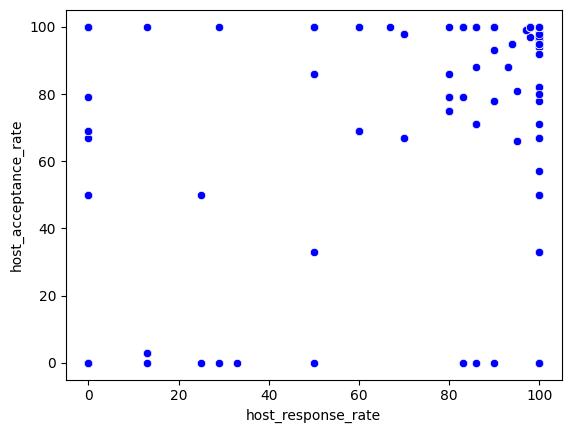

In [25]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=dfSR_limpios)

In [26]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfSR_limpios[['host_acceptance_rate']]
Var_Dep= dfSR_limpios['host_response_rate']

model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.52478006]),
 'rank_': 1,
 'singular_': array([477.57778345]),
 'intercept_': 38.268406265327705}

Modelo matemático

_y=0.52478006⋅x+38.268406265327705_

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

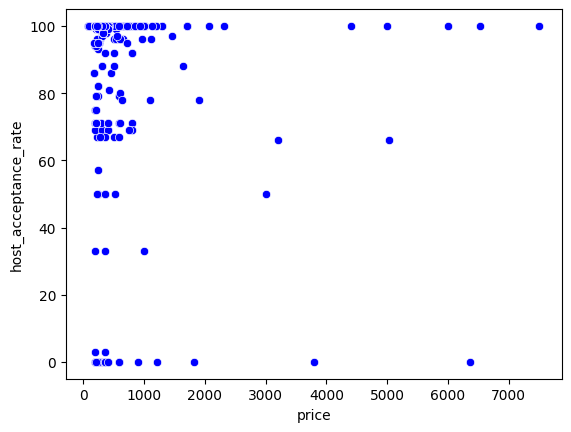

In [27]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=dfSR_limpios)

In [28]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfSR_limpios[['host_acceptance_rate']]
Var_Dep= dfSR_limpios['price']

model2 = LinearRegression()

model2.fit(X=Vars_Indep, y=Var_Dep)

model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.4447621]),
 'rank_': 1,
 'singular_': array([477.57778345]),
 'intercept_': 703.3806986000005}

Modelo matemático

_y=−1.4447621⋅x+703.3806986000005_

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

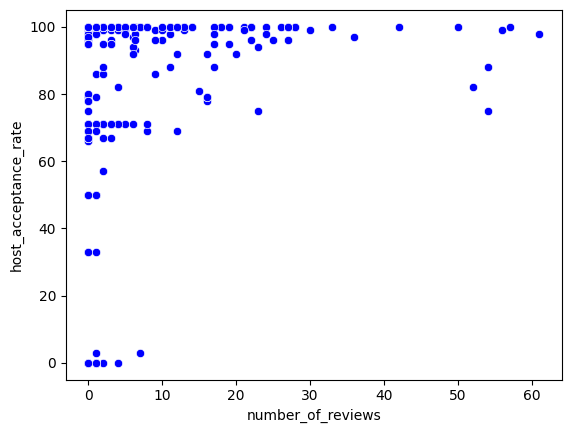

In [29]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=dfSR_limpios)

In [30]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfSR_limpios[['host_acceptance_rate']]
Var_Dep= dfSR_limpios['number_of_reviews']

model3 = LinearRegression()

model3.fit(X=Vars_Indep, y=Var_Dep)

model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.08989274]),
 'rank_': 1,
 'singular_': array([477.57778345]),
 'intercept_': -1.1305754667405479}

Modelo matemático:
_y=0.08989274⋅x+(−1.1305754667405479)_

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

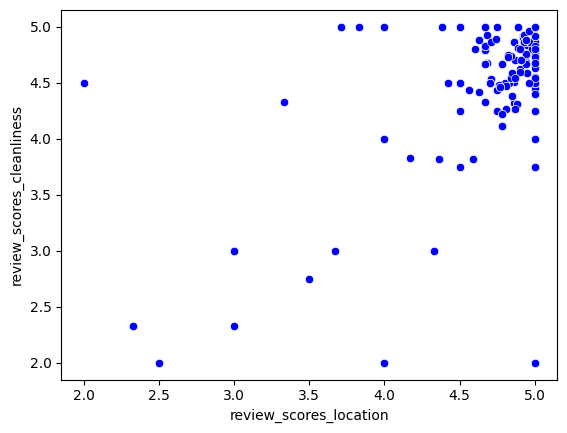

In [31]:
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="blue", data=dfSR_limpios)

In [32]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfSR_limpios[['review_scores_cleanliness']]
Var_Dep= dfSR_limpios['review_scores_location']

model4 = LinearRegression()

model4.fit(X=Vars_Indep, y=Var_Dep)

model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.42595744]),
 'rank_': 1,
 'singular_': array([11.66370061]),
 'intercept_': 2.7954670858535513}

Modelo matemático:

_y=0.42595744⋅x+2.7954670858535513_

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

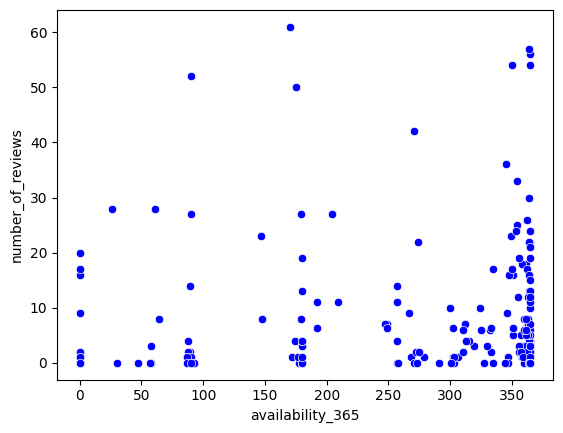

In [33]:
sns.scatterplot(x='availability_365', y='number_of_reviews', color="blue", data=dfSR_limpios)

In [34]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfSR_limpios[['number_of_reviews']]
Var_Dep= dfSR_limpios['availability_365']

model5 = LinearRegression()

model5.fit(X=Vars_Indep, y=Var_Dep)

model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.790033]),
 'rank_': 1,
 'singular_': array([184.27666709]),
 'intercept_': 300.8853906177703}

Modelo matemático:

_y=−0.790033⋅x+300.8853906177703_

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

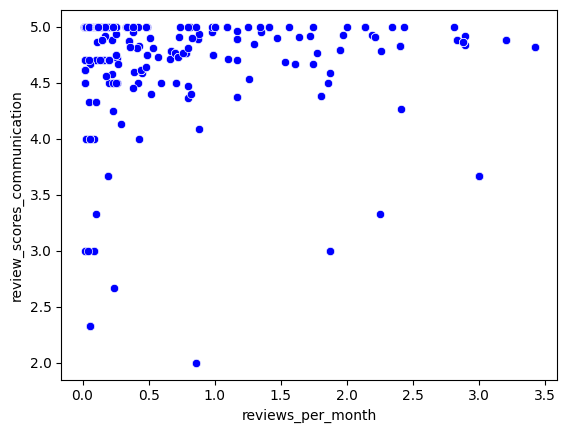

In [35]:
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="blue", data=dfSR_limpios)

In [36]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfSR_limpios[['review_scores_communication']]
Var_Dep= dfSR_limpios['reviews_per_month']

model6 = LinearRegression()

model6.fit(X=Vars_Indep, y=Var_Dep)

model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.12645115]),
 'rank_': 1,
 'singular_': array([9.53576419]),
 'intercept_': 1.345296415486645}

Modelo matemático:

_y=−0.12645115⋅x+1.345296415486645_


##TABLAS DE COEFICIENTES

In [37]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=dfSR_limpios.corr()
Corr_Factors1 = Corr_Factors.round(2)
Corr_Factors1

,host_response_rate,price,host_acceptance_rate,room_type,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
host_response_rate,1.00,-0.13,0.47,NaN,0.03,-0.11,-0.00,-0.12,-0.07,NaN,...,0.16,0.27,0.08,0.12,0.10,0.07,0.15,0.07,0.02,0.26
price,-0.13,1.00,-0.04,NaN,0.07,0.03,-0.09,0.06,0.07,NaN,...,-0.11,-0.13,-0.17,-0.18,-0.20,-0.19,-0.22,-0.16,-0.16,-0.13
host_acceptance_rate,0.47,-0.04,1.00,NaN,0.10,-0.07,-0.03,-0.14,-0.10,NaN,...,0.17,0.28,-0.04,-0.03,0.00,-0.06,0.02,-0.04,-0.08,0.20
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.03,0.07,0.10,NaN,1.00,0.06,0.09,0.12,0.09,NaN,...,-0.02,0.03,-0.09,-0.08,-0.09,-0.17,0.00,-0.16,-0.13,0.05
availability_30,-0.11,0.03,-0.07,NaN,0.06,1.00,0.37,0.63,0.65,NaN,...,-0.05,-0.08,-0.04,-0.08,-0.04,-0.04,-0.03,0.01,-0.03,-0.02
availability_365,-0.00,-0.09,-0.03,NaN,0.09,0.37,1.00,0.19,0.22,NaN,...,0.01,-0.01,0.00,-0.02,0.04,0.03,0.03,0.06,0.01,0.10
availability_60,-0.12,0.06,-0.14,NaN,0.12,0.63,0.19,1.00,0.57,NaN,...,-0.12,-0.08,-0.08,-0.07,-0.10,-0.05,-0.05,-0.06,-0.06,-0.08
availability_90,-0.07,0.07,-0.10,NaN,0.09,0.65,0.22,0.57,1.00,NaN,...,-0.08,-0.11,-0.05,-0.02,-0.08,-0.03,-0.05,-0.04,-0.05,0.00
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors2= abs(Corr_Factors1)
Corr_Factors2

,host_response_rate,price,host_acceptance_rate,room_type,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
host_response_rate,1.00,0.13,0.47,NaN,0.03,0.11,0.00,0.12,0.07,NaN,...,0.16,0.27,0.08,0.12,0.10,0.07,0.15,0.07,0.02,0.26
price,0.13,1.00,0.04,NaN,0.07,0.03,0.09,0.06,0.07,NaN,...,0.11,0.13,0.17,0.18,0.20,0.19,0.22,0.16,0.16,0.13
host_acceptance_rate,0.47,0.04,1.00,NaN,0.10,0.07,0.03,0.14,0.10,NaN,...,0.17,0.28,0.04,0.03,0.00,0.06,0.02,0.04,0.08,0.20
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.03,0.07,0.10,NaN,1.00,0.06,0.09,0.12,0.09,NaN,...,0.02,0.03,0.09,0.08,0.09,0.17,0.00,0.16,0.13,0.05
availability_30,0.11,0.03,0.07,NaN,0.06,1.00,0.37,0.63,0.65,NaN,...,0.05,0.08,0.04,0.08,0.04,0.04,0.03,0.01,0.03,0.02
availability_365,0.00,0.09,0.03,NaN,0.09,0.37,1.00,0.19,0.22,NaN,...,0.01,0.01,0.00,0.02,0.04,0.03,0.03,0.06,0.01,0.10
availability_60,0.12,0.06,0.14,NaN,0.12,0.63,0.19,1.00,0.57,NaN,...,0.12,0.08,0.08,0.07,0.10,0.05,0.05,0.06,0.06,0.08
availability_90,0.07,0.07,0.10,NaN,0.09,0.65,0.22,0.57,1.00,NaN,...,0.08,0.11,0.05,0.02,0.08,0.03,0.05,0.04,0.05,0.00
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


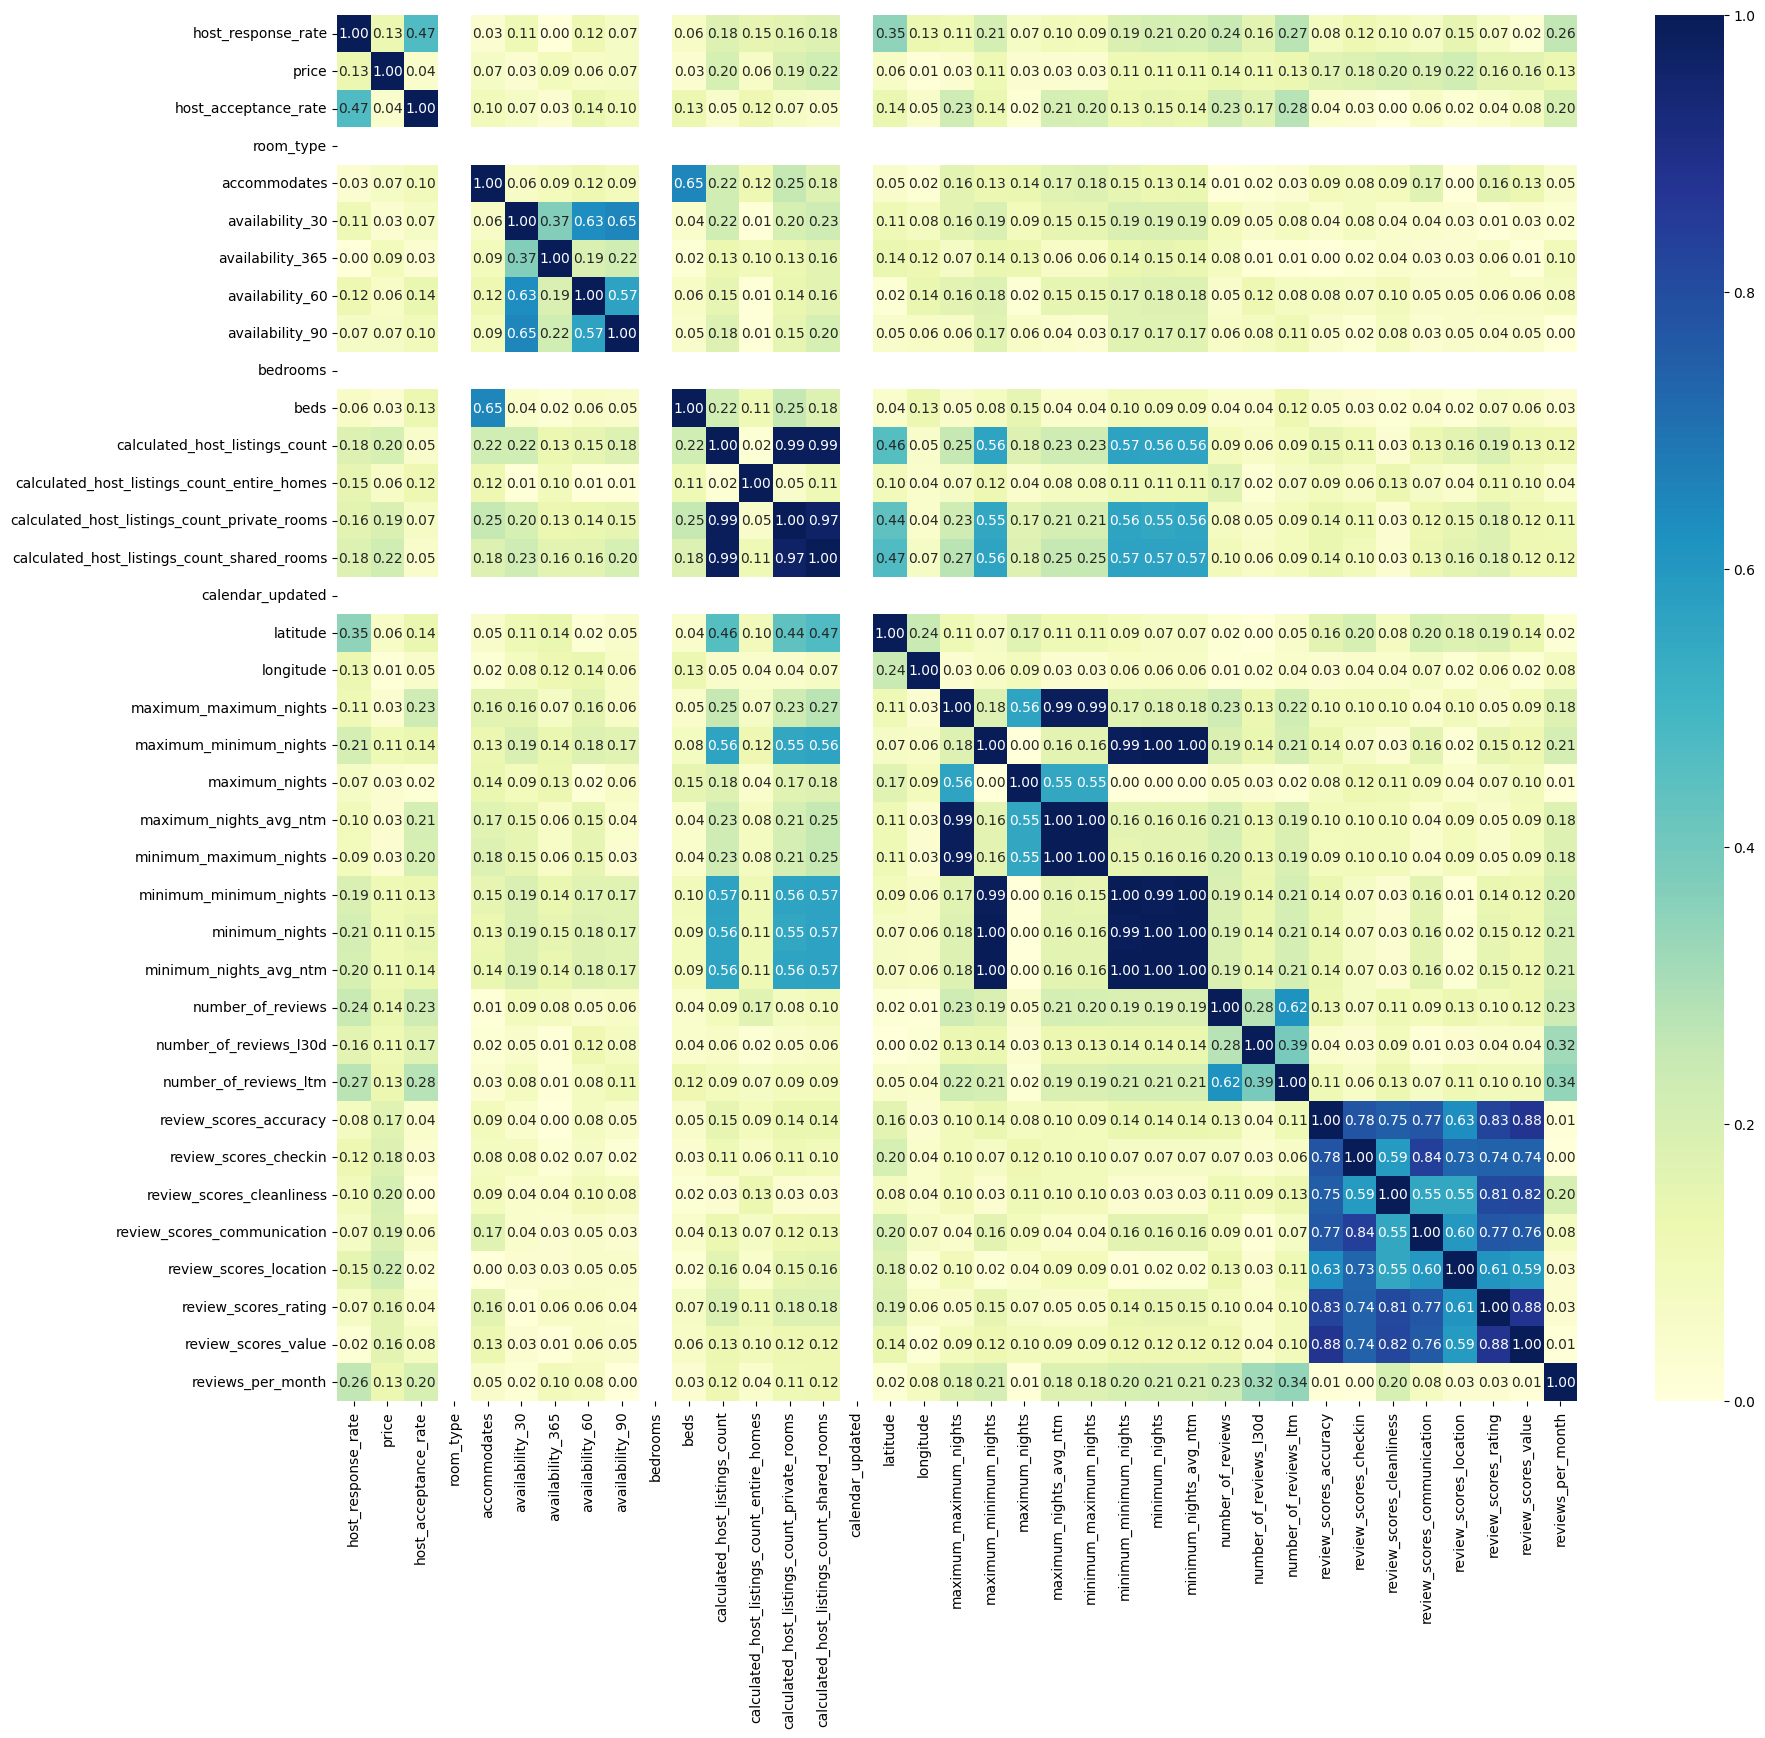

In [39]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 18))  # Puedes ajustar el tamaño (ancho, alto) según tus preferencias

# Crear el mapa de calor
Heat_Map = sns.heatmap(Corr_Factors2, cmap='YlGnBu', annot=True, fmt=".2f")

# Mostrar la gráfica
plt.show()

##Modelo matemático

In [40]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfSR_limpios[['host_acceptance_rate']]
Var_Dep= dfSR_limpios['number_of_reviews']

model7 = LinearRegression()

model7.fit(X=Vars_Indep, y=Var_Dep)

model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.08989274]),
 'rank_': 1,
 'singular_': array([477.57778345]),
 'intercept_': -1.1305754667405479}

In [41]:
y_pred= model.predict(X=dfSR_limpios[['host_acceptance_rate']])
y_pred

array([38.26840627, 83.39949157, 90.74641243, 88.64729219, 90.74641243,
       38.26840627, 72.90389034, 83.39949157, 87.072952  , 38.26840627,
       38.26840627, 86.54817194, 86.54817194, 72.90389034, 38.26840627,
       38.26840627, 81.30037132, 81.30037132, 55.5861483 , 87.59773206,
       64.50740935, 87.59773206, 79.20125108, 38.26840627, 38.26840627,
       73.4286704 , 73.4286704 , 90.74641243, 38.26840627, 90.74641243,
       38.26840627, 90.74641243, 39.84274645, 39.84274645, 74.47823052,
       74.47823052, 74.47823052, 38.26840627, 90.74641243, 90.74641243,
       90.74641243, 90.74641243, 90.74641243, 90.74641243, 74.47823052,
       90.74641243, 90.74641243, 83.39949157, 90.74641243, 38.26840627,
       90.74641243, 90.74641243, 90.74641243, 55.5861483 , 90.74641243,
       90.74641243, 90.74641243, 90.74641243, 64.50740935, 90.22163237,
       90.22163237, 90.22163237, 89.69685231, 90.74641243, 90.74641243,
       90.74641243, 90.74641243, 90.74641243, 90.74641243, 38.26

In [42]:
dfSR_limpios.insert(0, 'Predicciones', y_pred)
dfSR_limpios

,Predicciones,host_response_rate,price,host_acceptance_rate,room_type,accommodates,availability_30,availability_365,availability_60,availability_90,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
174,38.268406,50.0,1815.0,0.0,NaN,2.0,30,365,60.0,90.0,...,0.0,0.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
437,83.399492,50.0,182.0,86.0,NaN,2.0,11,346,41.0,71.0,...,0.0,5.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
443,90.746412,90.0,450.0,100.0,NaN,2.2,1,302,55.8,27.0,...,1.0,17.0,4.83,4.94,4.93,4.91,4.68,4.83,4.93,0.73
472,88.647292,100.0,272.0,96.0,NaN,2.2,26,354,56.0,86.0,...,0.0,3.0,4.80,4.68,4.48,4.72,4.80,4.40,4.60,0.26
499,90.746412,100.0,320.0,100.0,NaN,2.0,16,351,46.0,76.0,...,1.0,4.0,4.70,4.86,4.62,4.90,4.90,4.58,4.57,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,90.746412,100.0,250.0,100.0,NaN,1.0,30,365,60.0,90.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23762,90.746412,100.0,224.0,100.0,NaN,1.0,29,364,59.0,89.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23894,88.122512,100.0,720.0,95.0,NaN,5.0,30,364,60.0,90.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23898,88.122512,100.0,176.0,95.0,NaN,3.0,30,364,60.0,90.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

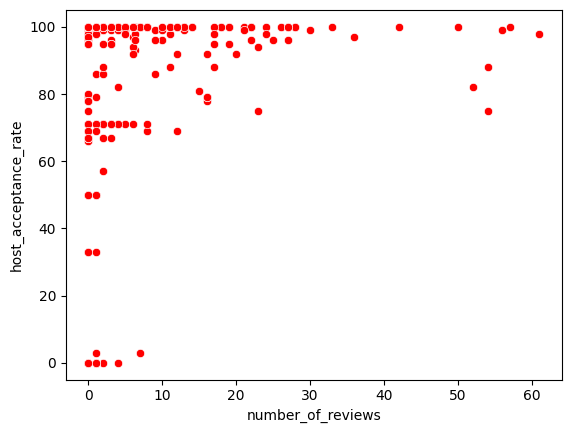

In [43]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=dfSR_limpios)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

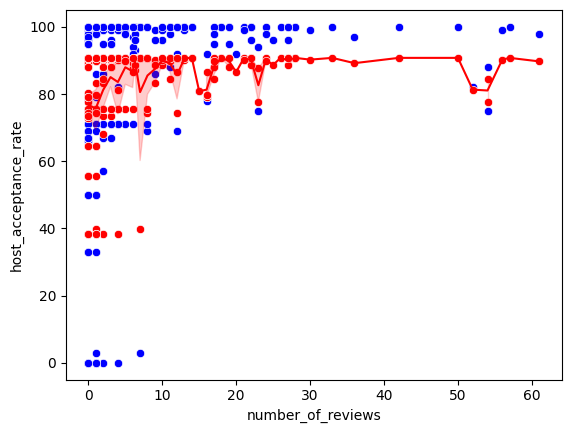

In [44]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=dfSR_limpios)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=dfSR_limpios)
sns.lineplot(x='number_of_reviews', y='Predicciones', color="red", data=dfSR_limpios)

#Separar por tipo de cuarto: 'Private room'

In [45]:
dfPR = df[df['room_type'] == 'Private room']
dfPR

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,61792,https://www.airbnb.com/rooms/61792,20230329041210,2023-03-30,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,299558,...,4.95,4.94,4.87,NaN,f,2,0,2,0,0.94
16,760912,https://www.airbnb.com/rooms/760912,20230329041210,2023-03-30,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,NaN,https://a0.muscache.com/pictures/10580755/b2dc...,3817743,...,4.60,4.80,4.60,NaN,f,1,0,1,0,0.04
17,2088218,https://www.airbnb.com/rooms/2088218,20230329041210,2023-03-30,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,"Es una zona residencial de Coyoacán, ubicada e...",https://a0.muscache.com/pictures/32395878/54f6...,10659485,...,4.80,4.40,4.40,NaN,f,1,0,1,0,0.04
18,2093036,https://www.airbnb.com/rooms/2093036,20230329041210,2023-03-29,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,El apartamento se encuentra en una zona reside...,https://a0.muscache.com/pictures/28553895/71d5...,3083561,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
21,131610,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,NaN,https://a0.muscache.com/pictures/837085/b9ed71...,647454,...,NaN,NaN,NaN,NaN,f,3,1,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,856473895554110501,https://www.airbnb.com/rooms/856473895554110501,20230329041210,2023-03-30,city scrape,506,""" THE BRIT "" es un edificio único en su clase ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,505303275,...,NaN,NaN,NaN,NaN,t,6,1,5,0,NaN
24213,853707681690048732,https://www.airbnb.com/rooms/853707681690048732,20230329041210,2023-03-30,city scrape,Beautiful Sunny bedroom off Masaryk,This cozy and sunny bedroom is the perfect pla...,Polanco one of the safest and best neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,506768013,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
24215,853746847434924262,https://www.airbnb.com/rooms/853746847434924262,20230329041210,2023-03-29,city scrape,Room with great view & BR 1 block from Reforma,Private room in Penthouse located in the heart...,Many restaurant option as well as cafes and ba...,https://a0.muscache.com/pictures/miso/Hosting-...,68325043,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
24218,853922041242738127,https://www.airbnb.com/rooms/853922041242738127,20230329041210,2023-03-29,city scrape,"Excelente Ambiente 5570,835,621",Tu familia estará cerca de todo si te hospedas...,NaN,https://a0.muscache.com/pictures/d2e3ac33-c092...,506810572,...,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN


In [46]:
dfPR.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1776
Length: 75, dtype: int64

##Llenar con 'bfill' los datos

In [47]:
dfPR =dfPR.fillna(method="bfill")
dfPR

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,61792,https://www.airbnb.com/rooms/61792,20230329041210,2023-03-30,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,299558,...,4.95,4.94,4.87,NaN,f,2,0,2,0,0.94
16,760912,https://www.airbnb.com/rooms/760912,20230329041210,2023-03-30,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,"Es una zona residencial de Coyoacán, ubicada e...",https://a0.muscache.com/pictures/10580755/b2dc...,3817743,...,4.60,4.80,4.60,NaN,f,1,0,1,0,0.04
17,2088218,https://www.airbnb.com/rooms/2088218,20230329041210,2023-03-30,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,"Es una zona residencial de Coyoacán, ubicada e...",https://a0.muscache.com/pictures/32395878/54f6...,10659485,...,4.80,4.40,4.40,NaN,f,1,0,1,0,0.04
18,2093036,https://www.airbnb.com/rooms/2093036,20230329041210,2023-03-29,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,El apartamento se encuentra en una zona reside...,https://a0.muscache.com/pictures/28553895/71d5...,3083561,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.04
21,131610,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,_________________________<br /><br />Roma Nort...,https://a0.muscache.com/pictures/837085/b9ed71...,647454,...,5.00,5.00,5.00,NaN,f,3,1,2,0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,856473895554110501,https://www.airbnb.com/rooms/856473895554110501,20230329041210,2023-03-30,city scrape,506,""" THE BRIT "" es un edificio único en su clase ...",Polanco one of the safest and best neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,505303275,...,NaN,NaN,NaN,NaN,t,6,1,5,0,NaN
24213,853707681690048732,https://www.airbnb.com/rooms/853707681690048732,20230329041210,2023-03-30,city scrape,Beautiful Sunny bedroom off Masaryk,This cozy and sunny bedroom is the perfect pla...,Polanco one of the safest and best neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,506768013,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
24215,853746847434924262,https://www.airbnb.com/rooms/853746847434924262,20230329041210,2023-03-29,city scrape,Room with great view & BR 1 block from Reforma,Private room in Penthouse located in the heart...,Many restaurant option as well as cafes and ba...,https://a0.muscache.com/pictures/miso/Hosting-...,68325043,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
24218,853922041242738127,https://www.airbnb.com/rooms/853922041242738127,20230329041210,2023-03-29,city scrape,"Excelente Ambiente 5570,835,621",Tu familia estará cerca de todo si te hospedas...,NaN,https://a0.muscache.com/pictures/d2e3ac33-c092...,506810572,...,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN


##Llenar con 'ffill' los datos

In [48]:
dfPR = dfPR.fillna(method="ffill")
dfPR

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,61792,https://www.airbnb.com/rooms/61792,20230329041210,2023-03-30,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,299558,...,4.95,4.94,4.87,NaN,f,2,0,2,0,0.94
16,760912,https://www.airbnb.com/rooms/760912,20230329041210,2023-03-30,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,"Es una zona residencial de Coyoacán, ubicada e...",https://a0.muscache.com/pictures/10580755/b2dc...,3817743,...,4.60,4.80,4.60,NaN,f,1,0,1,0,0.04
17,2088218,https://www.airbnb.com/rooms/2088218,20230329041210,2023-03-30,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,"Es una zona residencial de Coyoacán, ubicada e...",https://a0.muscache.com/pictures/32395878/54f6...,10659485,...,4.80,4.40,4.40,NaN,f,1,0,1,0,0.04
18,2093036,https://www.airbnb.com/rooms/2093036,20230329041210,2023-03-29,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,El apartamento se encuentra en una zona reside...,https://a0.muscache.com/pictures/28553895/71d5...,3083561,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.04
21,131610,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,_________________________<br /><br />Roma Nort...,https://a0.muscache.com/pictures/837085/b9ed71...,647454,...,5.00,5.00,5.00,NaN,f,3,1,2,0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,856473895554110501,https://www.airbnb.com/rooms/856473895554110501,20230329041210,2023-03-30,city scrape,506,""" THE BRIT "" es un edificio único en su clase ...",Polanco one of the safest and best neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,505303275,...,5.00,5.00,5.00,NaN,t,6,1,5,0,1.00
24213,853707681690048732,https://www.airbnb.com/rooms/853707681690048732,20230329041210,2023-03-30,city scrape,Beautiful Sunny bedroom off Masaryk,This cozy and sunny bedroom is the perfect pla...,Polanco one of the safest and best neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,506768013,...,5.00,5.00,5.00,NaN,f,1,0,1,0,1.00
24215,853746847434924262,https://www.airbnb.com/rooms/853746847434924262,20230329041210,2023-03-29,city scrape,Room with great view & BR 1 block from Reforma,Private room in Penthouse located in the heart...,Many restaurant option as well as cafes and ba...,https://a0.muscache.com/pictures/miso/Hosting-...,68325043,...,5.00,5.00,5.00,NaN,f,1,0,1,0,1.00
24218,853922041242738127,https://www.airbnb.com/rooms/853922041242738127,20230329041210,2023-03-29,city scrape,"Excelente Ambiente 5570,835,621",Tu familia estará cerca de todo si te hospedas...,Many restaurant option as well as cafes and ba...,https://a0.muscache.com/pictures/d2e3ac33-c092...,506810572,...,5.00,5.00,5.00,NaN,t,2,0,2,0,1.00


##Se tratan valores atípicos

In [49]:
# Lista de columnas a eliminar
columnas_eliminadas = ['neighbourhood_group_cleansed', 'bathrooms', 'license',
                       'id', 'scrape_id', 'host_id', 'host_listings_count',
                       'host_total_listings_count']

# Lista de columnas a mantener, que incluye 'host_response_rate' y 'price'
columnas_mantener = ['host_response_rate', 'price', 'host_acceptance_rate']

# Obtener todas las columnas numéricas que no están en la lista de columnas a eliminar
columnas_numericas = dfPR.select_dtypes(include=np.number).columns.difference(columnas_eliminadas)

# Crear un nuevo DataFrame que incluya las columnas que deseas mantener y las columnas numéricas
dfPR_numero = dfSR[columnas_mantener + list(columnas_numericas)]
dfPR_numero

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
174,50%,"$1,815.00",0%,2,30,365,60,90,1.0,1.0,...,0,0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
437,50%,$182.00,86%,2,11,346,41,71,1.0,3.0,...,0,5,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
443,90%,$450.00,100%,12,1,302,1,27,1.0,12.0,...,1,17,4.83,4.94,4.93,4.91,4.68,4.83,4.93,0.73
472,100%,$272.00,96%,16,26,354,56,86,1.0,18.0,...,0,3,4.80,4.68,4.48,4.72,4.80,4.40,4.60,0.26
499,100%,$320.00,100%,2,16,351,46,76,1.0,1.0,...,1,4,4.70,4.86,4.62,4.90,4.90,4.58,4.57,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,100%,$250.00,100%,1,30,365,60,90,1.0,1.0,...,0,0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23762,100%,$224.00,100%,1,29,364,59,89,1.0,1.0,...,0,0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23894,100%,$720.00,95%,5,30,364,60,90,1.0,3.0,...,0,0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23898,100%,$176.00,95%,3,30,364,60,90,1.0,4.0,...,0,0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00


In [50]:
# Elimina el símbolo de porcentaje (%) y convierte 'host_response_rate' a números
dfPR_numero['host_response_rate'] = dfPR_numero['host_response_rate'].str.rstrip('%').astype(float)

# Elimina el símbolo de dólar ($) y convierte 'price' a números
dfPR_numero['price'] = dfPR_numero['price'].str.replace('$', '').str.replace(',', '').astype(float)

dfPR_numero['host_acceptance_rate'] = dfPR_numero['host_acceptance_rate'].str.rstrip('%').astype(float)

<ipython-input-50-599a92f40d97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPR_numero['host_response_rate'] = dfPR_numero['host_response_rate'].str.rstrip('%').astype(float)
<ipython-input-50-599a92f40d97>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfPR_numero['price'] = dfPR_numero['price'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-50-599a92f40d97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [51]:
# Calcula el promedio de cada columna en dfSR_numero
promedio_columnas = dfPR_numero.mean()

# Rellena los valores nulos con el promedio de cada columna
dfPR_numero = dfPR_numero.fillna(promedio_columnas)

In [52]:
y=dfPR_numero
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_response_rate                               174.910411
price                                           8597.160450
host_acceptance_rate                             165.980896
accommodates                                      11.090042
availability_30                                   52.207688
availability_365                                 618.006808
availability_60                                  100.136062
availability_90                                  145.711488
bedrooms                                           1.000000
beds                                              12.958404
calculated_host_listings_count                   100.977859
calculated_host_listings_count_entire_homes        5.992098
calculated_host_listings_count_private_rooms      49.863764
calculated_host_listings_count_shared_rooms       51.447060
calendar_updated                                        NaN
latitude                                          19.566872
longitude     

In [53]:
dfPR_1= dfPR_numero[(y<=Limite_Superior)&(y>=Limite_Inferior)]
dfPR_1

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
174,50.0,1815.0,0.0,2.0,30,365,60.0,90.0,1.0,1.0,...,0.0,0.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
437,50.0,182.0,86.0,2.0,11,346,41.0,71.0,1.0,3.0,...,0.0,5.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
443,90.0,450.0,100.0,NaN,1,302,NaN,27.0,1.0,12.0,...,1.0,17.0,4.83,4.94,4.93,4.91,4.68,4.83,4.93,0.73
472,100.0,272.0,96.0,NaN,26,354,56.0,86.0,1.0,NaN,...,0.0,3.0,4.80,4.68,4.48,4.72,4.80,4.40,4.60,0.26
499,100.0,320.0,100.0,2.0,16,351,46.0,76.0,1.0,1.0,...,1.0,4.0,4.70,4.86,4.62,4.90,4.90,4.58,4.57,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,100.0,250.0,100.0,1.0,30,365,60.0,90.0,1.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23762,100.0,224.0,100.0,1.0,29,364,59.0,89.0,1.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23894,100.0,720.0,95.0,5.0,30,364,60.0,90.0,1.0,3.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23898,100.0,176.0,95.0,3.0,30,364,60.0,90.0,1.0,4.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00


In [54]:
dfPR_nulos = dfPR_1.isnull().sum()
dfPR_nulos

host_response_rate                                0
price                                             7
host_acceptance_rate                              0
accommodates                                      7
availability_30                                   0
availability_365                                  0
availability_60                                  19
availability_90                                  15
bedrooms                                          0
beds                                              9
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       4
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
calendar_updated                                293
latitude                                          3
longitude                                         9
maximum_maximum_nights                            0
maximum_minimum_nights                            4
maximum_nigh

In [55]:
dfPR_limpios = dfPR_1.copy()
dfPR_limpios = dfPR_1.fillna(round(dfPR_1.mean(),1))
dfPR_limpios

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
174,50.0,1815.0,0.0,2.0,30,365,60.0,90.0,1.0,1.0,...,0.0,0.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
437,50.0,182.0,86.0,2.0,11,346,41.0,71.0,1.0,3.0,...,0.0,5.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
443,90.0,450.0,100.0,2.2,1,302,55.8,27.0,1.0,12.0,...,1.0,17.0,4.83,4.94,4.93,4.91,4.68,4.83,4.93,0.73
472,100.0,272.0,96.0,2.2,26,354,56.0,86.0,1.0,2.0,...,0.0,3.0,4.80,4.68,4.48,4.72,4.80,4.40,4.60,0.26
499,100.0,320.0,100.0,2.0,16,351,46.0,76.0,1.0,1.0,...,1.0,4.0,4.70,4.86,4.62,4.90,4.90,4.58,4.57,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,100.0,250.0,100.0,1.0,30,365,60.0,90.0,1.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23762,100.0,224.0,100.0,1.0,29,364,59.0,89.0,1.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23894,100.0,720.0,95.0,5.0,30,364,60.0,90.0,1.0,3.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23898,100.0,176.0,95.0,3.0,30,364,60.0,90.0,1.0,4.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00


##Scatterplot y modelo matemático

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

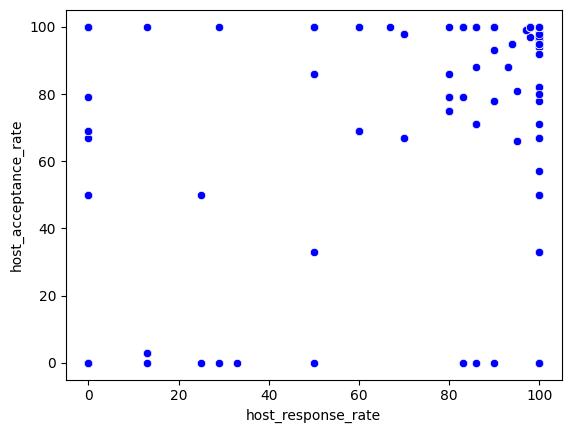

In [56]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=dfPR_limpios)

In [57]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfPR_limpios[['host_acceptance_rate']]
Var_Dep= dfPR_limpios['host_response_rate']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep, y=Var_Dep)

modelPR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.52478006]),
 'rank_': 1,
 'singular_': array([477.57778345]),
 'intercept_': 38.268406265327705}

Modelo matemático

_y=0.52478006⋅x+38.268406265327705_

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

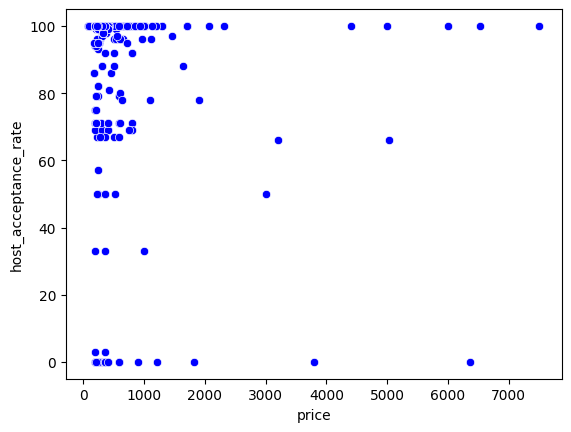

In [58]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=dfPR_limpios)

In [59]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfPR_limpios[['host_acceptance_rate']]
Var_Dep= dfPR_limpios['price']

model2PR = LinearRegression()

model2PR.fit(X=Vars_Indep, y=Var_Dep)

model2PR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.4447621]),
 'rank_': 1,
 'singular_': array([477.57778345]),
 'intercept_': 703.3806986000005}

Modelo matemático

_y=−1.4447621⋅x+703.3806986000005_

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

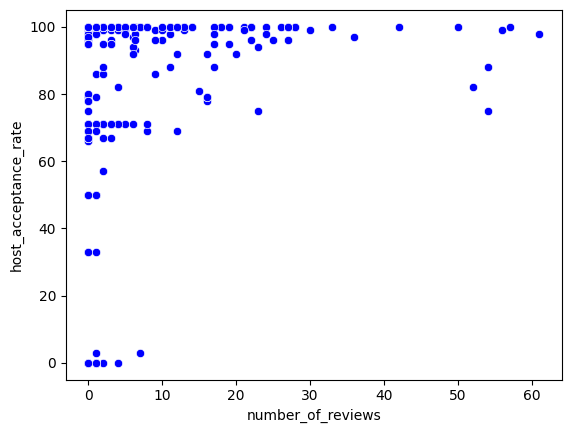

In [60]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=dfPR_limpios)

In [61]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfPR_limpios[['host_acceptance_rate']]
Var_Dep= dfPR_limpios['number_of_reviews']

model3PR = LinearRegression()

model3PR.fit(X=Vars_Indep, y=Var_Dep)

model3PR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.08989274]),
 'rank_': 1,
 'singular_': array([477.57778345]),
 'intercept_': -1.1305754667405479}

Modelo matemático:
_y=0.08989274⋅x+(−1.1305754667405479)_

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

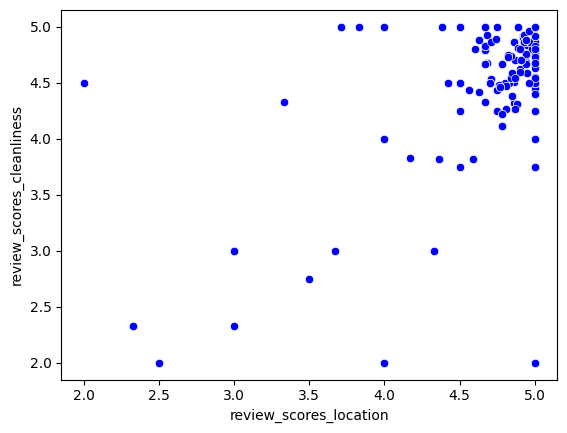

In [62]:
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="blue", data=dfPR_limpios)

In [63]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfPR_limpios[['review_scores_cleanliness']]
Var_Dep= dfPR_limpios['review_scores_location']

model4PR = LinearRegression()

model4PR.fit(X=Vars_Indep, y=Var_Dep)

model4PR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.42595744]),
 'rank_': 1,
 'singular_': array([11.66370061]),
 'intercept_': 2.7954670858535513}

Modelo matemático:

_y=0.42595744⋅x+2.7954670858535513_

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

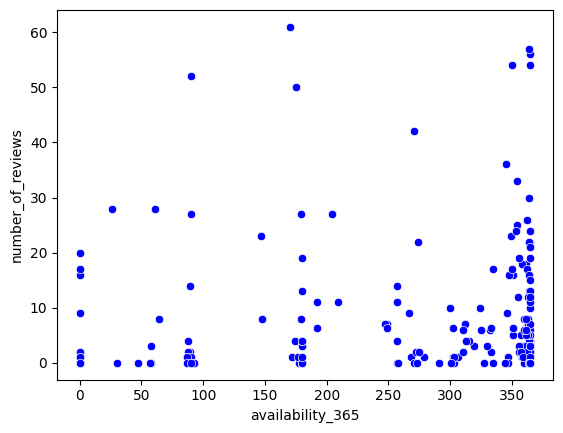

In [64]:
sns.scatterplot(x='availability_365', y='number_of_reviews', color="blue", data=dfPR_limpios)

In [65]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfPR_limpios[['number_of_reviews']]
Var_Dep= dfPR_limpios['availability_365']

model5PR = LinearRegression()

model5PR.fit(X=Vars_Indep, y=Var_Dep)

model5PR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.790033]),
 'rank_': 1,
 'singular_': array([184.27666709]),
 'intercept_': 300.8853906177703}

Modelo matemático:

_y=−0.790033⋅x+300.8853906177703_

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

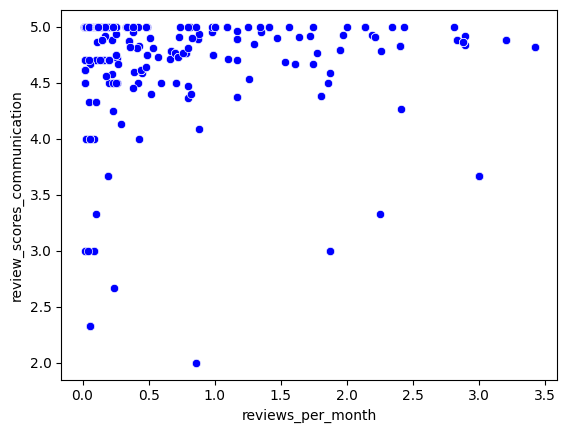

In [66]:
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="blue", data=dfPR_limpios)

In [67]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfPR_limpios[['review_scores_communication']]
Var_Dep= dfPR_limpios['reviews_per_month']

model6PR = LinearRegression()

model6PR.fit(X=Vars_Indep, y=Var_Dep)

model6PR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.12645115]),
 'rank_': 1,
 'singular_': array([9.53576419]),
 'intercept_': 1.345296415486645}

Modelo matemático:

_y=−0.12645115⋅x+1.345296415486645_


##TABLAS DE COEFICIENTES

In [68]:
#Encontramos todas las correlaciones entre las variables
Corr_FactorsPR = dfPR_limpios.corr()
Corr_Factors1PR = Corr_FactorsPR.round(2)
Corr_Factors1PR

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
host_response_rate,1.00,-0.13,0.47,0.03,-0.11,-0.00,-0.12,-0.07,NaN,0.06,...,0.16,0.27,0.08,0.12,0.10,0.07,0.15,0.07,0.02,0.26
price,-0.13,1.00,-0.04,0.07,0.03,-0.09,0.06,0.07,NaN,0.03,...,-0.11,-0.13,-0.17,-0.18,-0.20,-0.19,-0.22,-0.16,-0.16,-0.13
host_acceptance_rate,0.47,-0.04,1.00,0.10,-0.07,-0.03,-0.14,-0.10,NaN,0.13,...,0.17,0.28,-0.04,-0.03,0.00,-0.06,0.02,-0.04,-0.08,0.20
accommodates,0.03,0.07,0.10,1.00,0.06,0.09,0.12,0.09,NaN,0.65,...,-0.02,0.03,-0.09,-0.08,-0.09,-0.17,0.00,-0.16,-0.13,0.05
availability_30,-0.11,0.03,-0.07,0.06,1.00,0.37,0.63,0.65,NaN,0.04,...,-0.05,-0.08,-0.04,-0.08,-0.04,-0.04,-0.03,0.01,-0.03,-0.02
availability_365,-0.00,-0.09,-0.03,0.09,0.37,1.00,0.19,0.22,NaN,0.02,...,0.01,-0.01,0.00,-0.02,0.04,0.03,0.03,0.06,0.01,0.10
availability_60,-0.12,0.06,-0.14,0.12,0.63,0.19,1.00,0.57,NaN,0.06,...,-0.12,-0.08,-0.08,-0.07,-0.10,-0.05,-0.05,-0.06,-0.06,-0.08
availability_90,-0.07,0.07,-0.10,0.09,0.65,0.22,0.57,1.00,NaN,-0.05,...,-0.08,-0.11,-0.05,-0.02,-0.08,-0.03,-0.05,-0.04,-0.05,0.00
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,0.06,0.03,0.13,0.65,0.04,0.02,0.06,-0.05,NaN,1.00,...,0.04,0.12,-0.05,-0.03,-0.02,-0.04,0.02,-0.07,-0.06,0.03


In [69]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors2PR = abs(Corr_Factors1PR)
Corr_Factors2PR

,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,beds,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
host_response_rate,1.00,0.13,0.47,0.03,0.11,0.00,0.12,0.07,NaN,0.06,...,0.16,0.27,0.08,0.12,0.10,0.07,0.15,0.07,0.02,0.26
price,0.13,1.00,0.04,0.07,0.03,0.09,0.06,0.07,NaN,0.03,...,0.11,0.13,0.17,0.18,0.20,0.19,0.22,0.16,0.16,0.13
host_acceptance_rate,0.47,0.04,1.00,0.10,0.07,0.03,0.14,0.10,NaN,0.13,...,0.17,0.28,0.04,0.03,0.00,0.06,0.02,0.04,0.08,0.20
accommodates,0.03,0.07,0.10,1.00,0.06,0.09,0.12,0.09,NaN,0.65,...,0.02,0.03,0.09,0.08,0.09,0.17,0.00,0.16,0.13,0.05
availability_30,0.11,0.03,0.07,0.06,1.00,0.37,0.63,0.65,NaN,0.04,...,0.05,0.08,0.04,0.08,0.04,0.04,0.03,0.01,0.03,0.02
availability_365,0.00,0.09,0.03,0.09,0.37,1.00,0.19,0.22,NaN,0.02,...,0.01,0.01,0.00,0.02,0.04,0.03,0.03,0.06,0.01,0.10
availability_60,0.12,0.06,0.14,0.12,0.63,0.19,1.00,0.57,NaN,0.06,...,0.12,0.08,0.08,0.07,0.10,0.05,0.05,0.06,0.06,0.08
availability_90,0.07,0.07,0.10,0.09,0.65,0.22,0.57,1.00,NaN,0.05,...,0.08,0.11,0.05,0.02,0.08,0.03,0.05,0.04,0.05,0.00
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,0.06,0.03,0.13,0.65,0.04,0.02,0.06,0.05,NaN,1.00,...,0.04,0.12,0.05,0.03,0.02,0.04,0.02,0.07,0.06,0.03


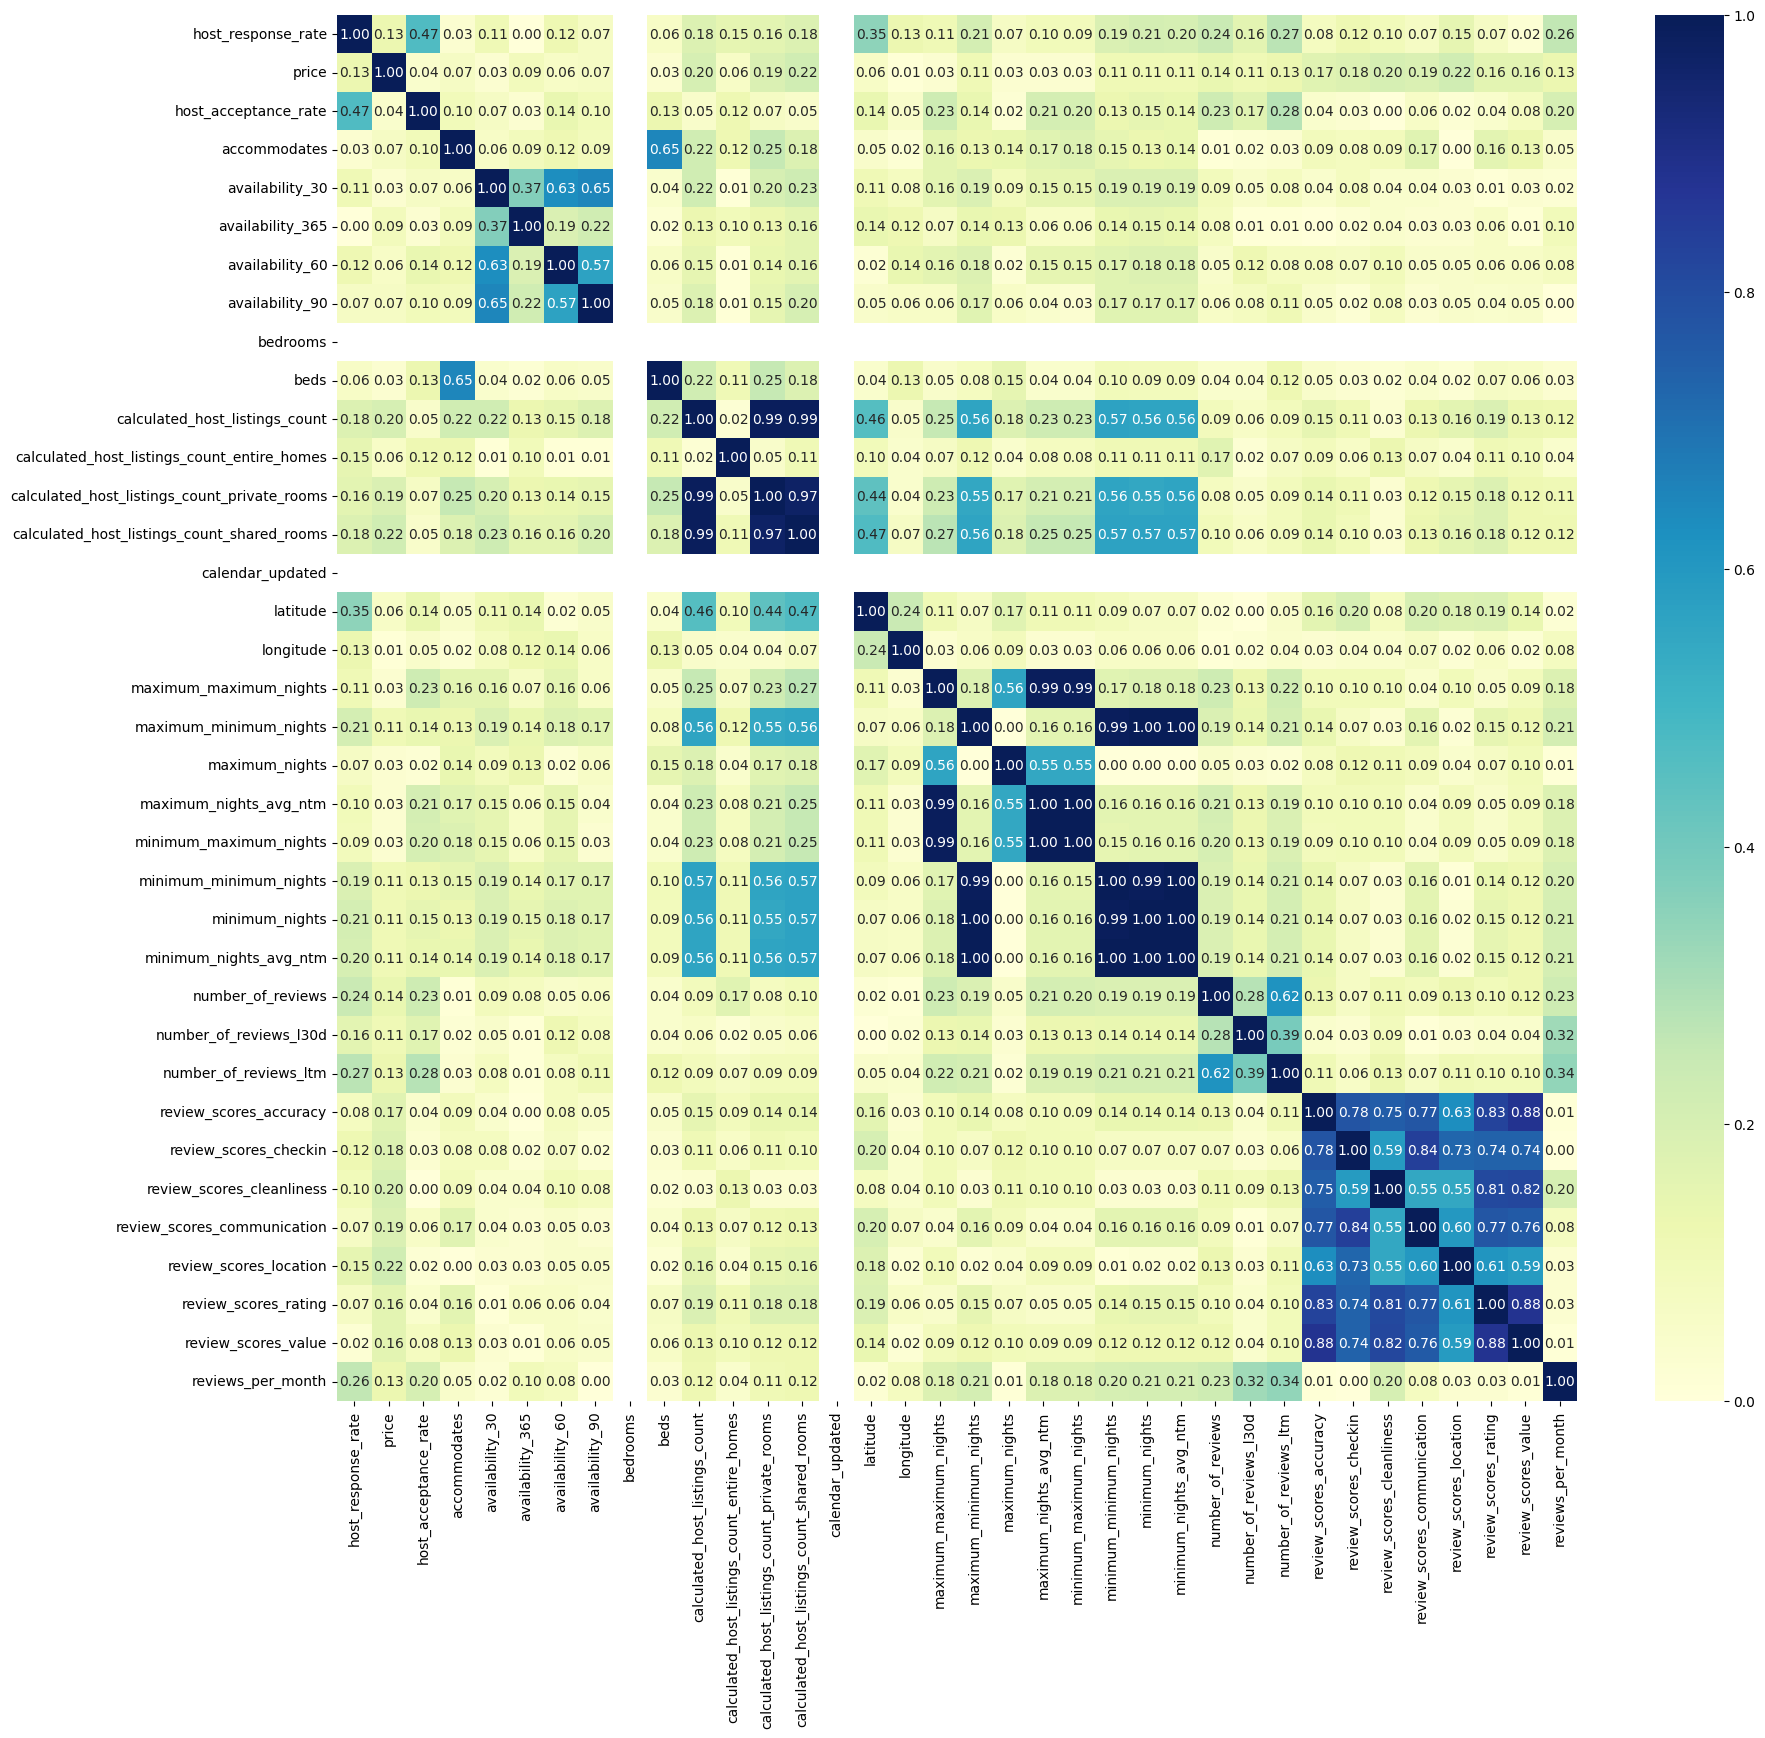

In [70]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 18))  # Puedes ajustar el tamaño (ancho, alto) según tus preferencias

# Crear el mapa de calor
Heat_MapPR = sns.heatmap(Corr_Factors2PR, cmap='YlGnBu', annot=True, fmt=".2f")

# Mostrar la gráfica
plt.show()

##Modelo matemático

In [71]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfPR_limpios[['host_acceptance_rate']]
Var_Dep= dfPR_limpios['number_of_reviews']

model7PR = LinearRegression()

model7PR.fit(X=Vars_Indep, y=Var_Dep)

model7PR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.08989274]),
 'rank_': 1,
 'singular_': array([477.57778345]),
 'intercept_': -1.1305754667405479}

In [72]:
y_pred= model.predict(X=dfPR_limpios[['host_acceptance_rate']])
y_pred

array([38.26840627, 83.39949157, 90.74641243, 88.64729219, 90.74641243,
       38.26840627, 72.90389034, 83.39949157, 87.072952  , 38.26840627,
       38.26840627, 86.54817194, 86.54817194, 72.90389034, 38.26840627,
       38.26840627, 81.30037132, 81.30037132, 55.5861483 , 87.59773206,
       64.50740935, 87.59773206, 79.20125108, 38.26840627, 38.26840627,
       73.4286704 , 73.4286704 , 90.74641243, 38.26840627, 90.74641243,
       38.26840627, 90.74641243, 39.84274645, 39.84274645, 74.47823052,
       74.47823052, 74.47823052, 38.26840627, 90.74641243, 90.74641243,
       90.74641243, 90.74641243, 90.74641243, 90.74641243, 74.47823052,
       90.74641243, 90.74641243, 83.39949157, 90.74641243, 38.26840627,
       90.74641243, 90.74641243, 90.74641243, 55.5861483 , 90.74641243,
       90.74641243, 90.74641243, 90.74641243, 64.50740935, 90.22163237,
       90.22163237, 90.22163237, 89.69685231, 90.74641243, 90.74641243,
       90.74641243, 90.74641243, 90.74641243, 90.74641243, 38.26

In [77]:
dfPR_limpios.insert(0, 'PrediccionesPR', y_pred)
dfPR_limpios

,PrediccionesPR,host_response_rate,price,host_acceptance_rate,accommodates,availability_30,availability_365,availability_60,availability_90,bedrooms,...,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
174,38.268406,50.0,1815.0,0.0,2.0,30,365,60.0,90.0,1.0,...,0.0,0.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
437,83.399492,50.0,182.0,86.0,2.0,11,346,41.0,71.0,1.0,...,0.0,5.0,4.89,4.89,4.67,5.00,4.78,5.00,4.89,0.10
443,90.746412,90.0,450.0,100.0,2.2,1,302,55.8,27.0,1.0,...,1.0,17.0,4.83,4.94,4.93,4.91,4.68,4.83,4.93,0.73
472,88.647292,100.0,272.0,96.0,2.2,26,354,56.0,86.0,1.0,...,0.0,3.0,4.80,4.68,4.48,4.72,4.80,4.40,4.60,0.26
499,90.746412,100.0,320.0,100.0,2.0,16,351,46.0,76.0,1.0,...,1.0,4.0,4.70,4.86,4.62,4.90,4.90,4.58,4.57,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,90.746412,100.0,250.0,100.0,1.0,30,365,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23762,90.746412,100.0,224.0,100.0,1.0,29,364,59.0,89.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23894,88.122512,100.0,720.0,95.0,5.0,30,364,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00
23898,88.122512,100.0,176.0,95.0,3.0,30,364,60.0,90.0,1.0,...,0.0,0.0,3.67,4.33,4.67,3.67,4.67,4.00,3.67,3.00


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

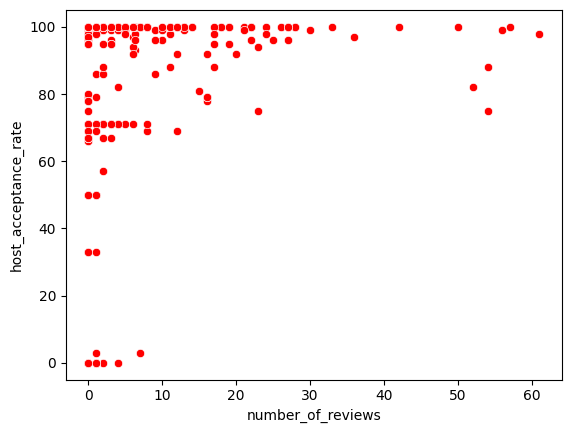

In [78]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=dfPR_limpios)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

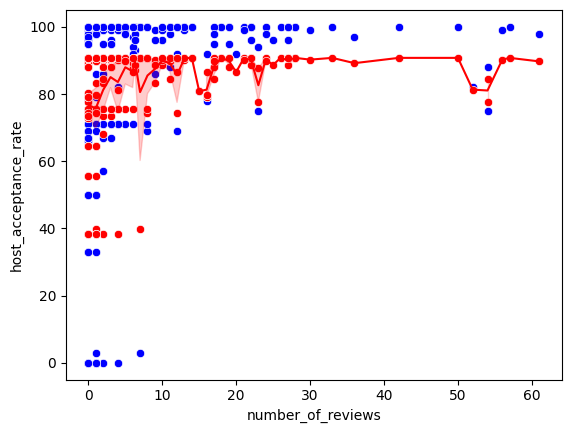

In [79]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=dfPR_limpios)
sns.scatterplot(x='number_of_reviews', y='PrediccionesPR', color="red", data=dfPR_limpios)
sns.lineplot(x='number_of_reviews', y='PrediccionesPR', color="red", data=dfPR_limpios)